## Sampling Distributions

In [103]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

### Random Sampling in Python

In [104]:
population = pd.read_csv("./csv/salmon_population.csv")
population = np.array(population.Salmon_Weight)
pop_mean = round(np.mean(population),3)

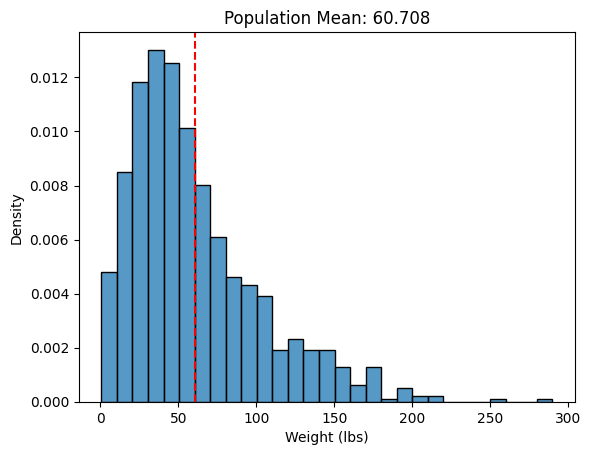

<Figure size 640x480 with 0 Axes>

In [105]:
## Plotting the Population Distribution
sns.histplot(population, stat='density')
plt.axvline(pop_mean,color='r',linestyle='dashed')
plt.title(f"Population Mean: {pop_mean}")
plt.xlabel("Weight (lbs)")
plt.show()
plt.clf() # close this plot

In [106]:
samp_size = 30
# Generate our random sample below
sample = np.random.choice(np.array(population), samp_size, replace = False)
sample_mean = round(np.mean(sample),3)
sample_mean

72.064

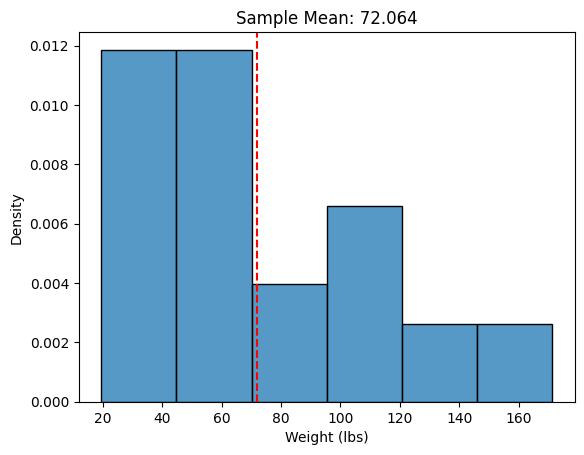

In [107]:
sns.histplot(sample, stat='density')
plt.axvline(sample_mean, color='r', linestyle='dashed')
plt.title(F"Sample Mean: {sample_mean}")
plt.xlabel("Weight (lbs)")
plt.show()

### Central Limit Theorem

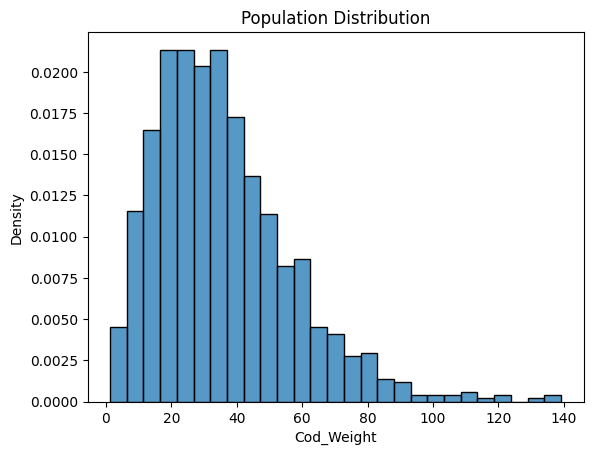

In [108]:
cod_population = pd.read_csv("./csv/cod_population.csv")
population_cod = cod_population['Cod_Weight']

sns.histplot(population_cod, stat="density")
plt.title("Population Distribution")
plt.show()

In [109]:
sample_means = []
samp_size = 50

for i in range(500):
    samp = np.random.choice(population_cod, samp_size, replace=False)
    this_sample_mean = np.mean(samp)
    sample_means.append(this_sample_mean)

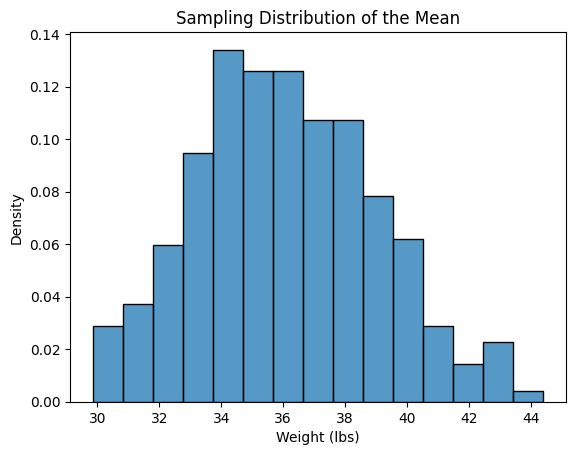

In [110]:
plt.clf()
sns.histplot(sample_means, stat="density")
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show()

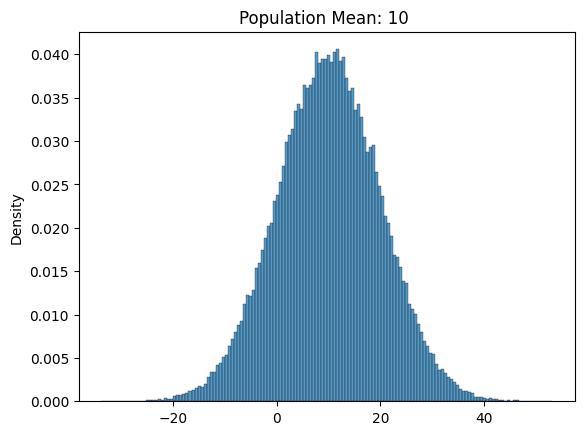

<Figure size 640x480 with 0 Axes>

In [111]:
population_mean = 10
population_std_dev = 10

samp_size = 50
population = np.random.normal(population_mean, population_std_dev, size = 100000)

sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)

sns.histplot(population, stat = 'density')
plt.title(f"Population Mean: {population_mean} ")
plt.xlabel("")
plt.show()
plt.clf()


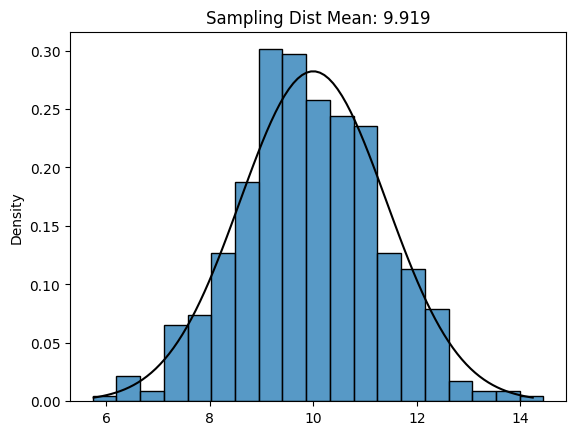

In [112]:
sns.histplot(sample_means, stat='density')
mu = np.mean(population)
sigma = np.std(population)/(samp_size**.5)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution}")
plt.xlabel("")
plt.show()

### Standard Error

In [113]:
population_mean = 36
population_std_dev = 10

samp_size = 500

# Create the population
population = np.random.normal(population_mean, population_std_dev, size = 100000)

# Simulate the sampling distribution
sample_means = []
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    sample_means.append(np.mean(samp))

mean_sampling_distribution = round(np.mean(sample_means),3)
std_sampling_distribution = round(np.std(sample_means),3)

std_error = population_std_dev / (samp_size **0.5)

std_error

0.4472135954999579

### Biased Estimators

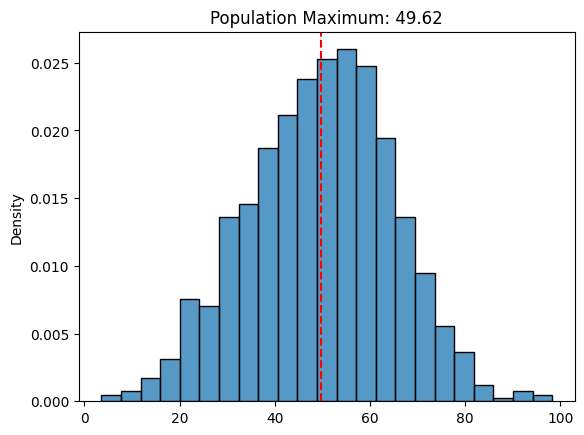

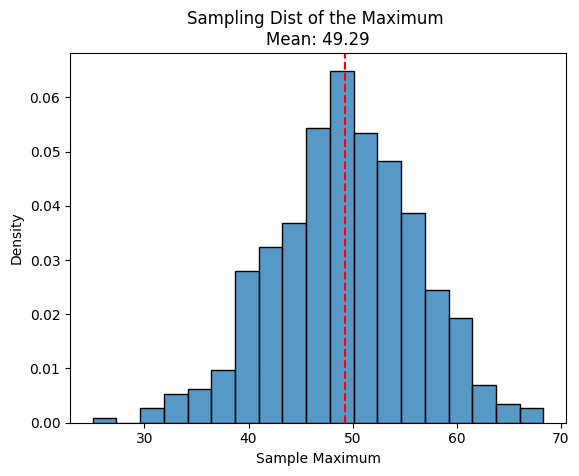

<Figure size 640x480 with 0 Axes>

In [114]:
app_stat_text = "Maximum"
def app_statistic(x):
    return np.mean(x) # change this with np.max or np.var

mean, std_dev = 50, 15
population = np.random.normal(mean, std_dev, 1000)

pop_statistic = round(app_statistic(population),2)

sns.histplot(population, stat = 'density')
plt.axvline(pop_statistic,color='r',linestyle='dashed')
plt.title(f"Population {app_stat_text}: {pop_statistic}")
plt.xlabel("")
plt.show()
plt.clf()

sample_stats = []
samp_size = 5
for i in range(500):
    samp = np.random.choice(population, samp_size, replace = False)
    this_sample_stat = app_statistic(samp)
    sample_stats.append(this_sample_stat)

sns.histplot(sample_stats, stat = 'density')
plt.title(f"Sampling Dist of the {app_stat_text} \nMean: {round(np.mean(sample_stats),2)}")
plt.axvline(np.mean(sample_stats),color='r',linestyle='dashed')
plt.xlabel(f"Sample {app_stat_text}")
plt.show()
plt.clf()


### Calculating Probabilities

In [115]:
x = 750/25
std_dev = 20
mean = 36
samp_size = 25
standard_error = std_dev / (samp_size **.5)

cod_cdf = stats.norm.cdf(x,mean,standard_error)
print(str(round(cod_cdf * 100, 2)) + "%")

6.68%


### Review

- A sampling distribution is obtained by taking a random sample of a certain size multiple times, taking a sample statistic, and plotting the distribution of this sample statistic.

- The Central Limit Theorem establishes that the sampling distribution of the mean will be normally distributed (even if the original population was not normally distributed).

- A statistic is called an unbiased estimator of a population parameter if the mean of the sampling distribution of the statistic is equal to the value of the statistic for the population. The mean is an unbiased estimator.

- We can use the Standard Error of our sample mean distribution in order to calculate probabilities of obtaining a sample with a certain statistic using the CDF.